In [1]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv('/Users/apple/Downloads/data (1).csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    object 
 2   Married            427 non-null    object 
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.8+ KB


In [5]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    float64
 2   Married            427 non-null    float64
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 43.8+ KB


In [6]:
train_df.isnull().sum()


Loan_ID               0
Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      8
Credit_History       36
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
## dropping all the missing values
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((335, 5), (335,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [10]:
######
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=5)

In [11]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7313432835820896

In [12]:
pred_train = model.predict(X_train)
accuracy_score(y_train, pred_train)

0.8134328358208955

In [13]:
!pip install mlflow

import mlflow

mlflow.set_experiment("Loan Application")

<Experiment: artifact_location='file:///Users/apple/Desktop/mlruns/769164606528168957', creation_time=1761754056508, experiment_id='769164606528168957', last_update_time=1761754056508, lifecycle_stage='active', name='Loan Application', tags={}>

In [14]:

with mlflow.start_run():
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)

    pred_val = model_rf.predict(X_val)
    val_acc= accuracy_score(y_val, pred_val)

    pred_train = model_rf.predict(X_train)
    train_acc= accuracy_score(y_train, pred_train)

    mlflow.set_tag ('mlflow.runName', 'first_run')
    mlflow.log_param('max_depth',4)
    mlflow.log_metric ('val_acc', val_acc)
    mlflow.log_metric ('train_acc', train_acc)

    mlflow.sklearn.log_model(model_rf,"rf model")
    
    
    
    
    


2025/10/29 21:45:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/29 21:45:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [15]:
!mlflow ui

INFO:     Uvicorn running on http://127.0.0.1:5000 (Press CTRL+C to quit)
INFO:     Started parent process [9329]
INFO:     Started server process [9331]
INFO:     Started server process [9333]
INFO:     Waiting for application startup.
INFO:     Waiting for application startup.
INFO:     Started server process [9334]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Application startup complete.
INFO:     Started server process [9332]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Application startup complete.
INFO:     127.0.0.1:59269 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:59269 - "GET /static-files/static/js/main.e1ed6ef5.js HTTP/1.1" 200 OK
INFO:     127.0.0.1:59270 - "GET /static-files/static/css/main.702595df.css HTTP/1.1" 200 OK
INFO:     127.0.0.1:59269 - "GET /static-files/static/js/9478.cbf55ef3.chunk.js HTTP/1.1" 304 Not Modified
INFO:     127.0.0.1:59269 - "GET /static-files/mani

In [19]:
def ml_flow_runs (n_est, max_dep, i):
    with mlflow.start_run():
        model_rf = RandomForestClassifier(max_depth=max_dep,n_estimators=n_est, random_state=5)
        model_rf.fit(X_train, y_train)
    
        pred_val = model_rf.predict(X_val)
        val_acc= accuracy_score(y_val, pred_val)
    
        pred_train = model_rf.predict(X_train)
        train_acc= accuracy_score(y_train, pred_train)

        run ="Run: "+str(i)
        mlflow.set_tag ('mlflow.runName',run)
        mlflow.log_param('max_depth',max_dep)
        mlflow.log_param('estimators',n_est)
        mlflow.log_metric ('val_acc', val_acc)
        mlflow.log_metric ('train_acc', train_acc)
    
        mlflow.sklearn.log_model(model_rf,"rf model")
        

In [20]:
for i in range(1,11):
    ml_flow_runs(10+i,1+i,i)
    

2025/10/29 21:55:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/29 21:55:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/29 21:55:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/29 21:55:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/29 21:55:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/29 21:55:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/29 21:55:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use 

In [24]:
!mlflow ui

INFO:     Uvicorn running on http://127.0.0.1:5000 (Press CTRL+C to quit)
INFO:     Started parent process [9485]
INFO:     Started server process [9487]
INFO:     Waiting for application startup.
INFO:     Started server process [9489]
INFO:     Waiting for application startup.
INFO:     Started server process [9488]
INFO:     Application startup complete.
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Application startup complete.
INFO:     Started server process [9490]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     127.0.0.1:59485 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:59485 - "GET /ajax-api/2.0/mlflow/experiments/search?max_results=25&order_by=last_update_time+DESC HTTP/1.1" 200 OK
INFO:     127.0.0.1:59486 - "GET /ajax-api/2.0/mlflow/experiments/search?max_results=25&order_by=last_update_time+DESC HTTP/1.1" 200 OK
INFO:     127.0.0.1:59491 - "GET /ajax-api/2.0/mlflow/experiments/get?

In [22]:
!lsof -i :5000

COMMAND   PID  USER   FD   TYPE             DEVICE SIZE/OFF NODE NAME
ControlCe 583 apple   10u  IPv4 0x1d81ab7580cc7a61      0t0  TCP *:commplex-main (LISTEN)
ControlCe 583 apple   11u  IPv6 0xa032c8e9a57427d0      0t0  TCP *:commplex-main (LISTEN)
ControlCe 583 apple   21u  IPv4 0x9c4a0145f468f326      0t0  TCP localhost:commplex-main->localhost:59380 (ESTABLISHED)
Google    958 apple   36u  IPv4 0xcccfd4ecab638d63      0t0  TCP localhost:59380->localhost:commplex-main (ESTABLISHED)


In [23]:
!kill -9 583

In [ ]:
!mlflow ui

In [25]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

2025/10/29 22:25:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/29 22:25:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


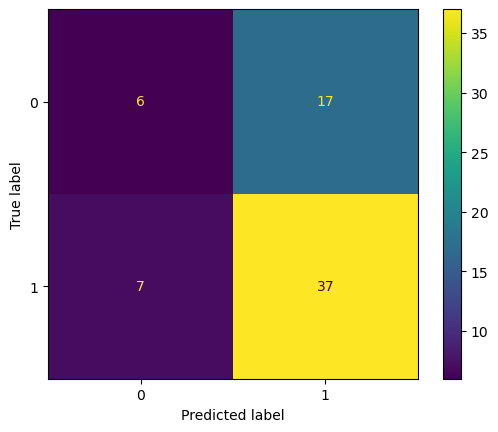

In [27]:
with mlflow.start_run():
    model_knn = KNeighborsClassifier(n_neighbors=5)
    model_knn.fit(X_train, y_train)

    pred_val = model_knn.predict(X_val)
    val_acc= accuracy_score(y_val, pred_val)

    pred_train = model_knn.predict(X_train)
    train_acc= accuracy_score(y_train, pred_train)

    run ="KNN"
    mlflow.set_tag ('mlflow.runName',run)
    mlflow.log_param('neighbors',5)
    mlflow.log_metric ('val_acc', val_acc)
    mlflow.log_metric ('train_acc', train_acc)

    cm= ConfusionMatrixDisplay.from_predictions(y_val,pred_val)
    cm.figure_.savefig('Confusion_mat.png')

    mlflow.log_artifact('Confusion_mat.png')

    
    mlflow.sklearn.log_model(model_knn,"KNN model")

In [28]:
!lsof -i :5000

COMMAND    PID  USER   FD   TYPE             DEVICE SIZE/OFF NODE NAME
Google     958 apple   35u  IPv4 0x9c4a0145f468f326      0t0  TCP localhost:59810->localhost:commplex-main (ESTABLISHED)
Google     958 apple   69u  IPv4 0xd85dfb0ed3ca6e00      0t0  TCP localhost:59826->localhost:commplex-main (ESTABLISHED)
ControlCe 9480 apple   10u  IPv4 0xfc4daa352764a2a1      0t0  TCP *:commplex-main (LISTEN)
ControlCe 9480 apple   11u  IPv6 0x42fdd50544e35951      0t0  TCP *:commplex-main (LISTEN)
ControlCe 9480 apple   18u  IPv4 0x3e7e764c696b9dc4      0t0  TCP localhost:commplex-main->localhost:59810 (ESTABLISHED)
ControlCe 9480 apple   22u  IPv4 0x345b7c8edfca720f      0t0  TCP localhost:commplex-main->localhost:59826 (ESTABLISHED)


In [29]:
!kill -9 9480

In [30]:
!mlflow ui

INFO:     Uvicorn running on http://127.0.0.1:5000 (Press CTRL+C to quit)
INFO:     Started parent process [9746]
INFO:     Started server process [9750]
INFO:     Waiting for application startup.
INFO:     Started server process [9749]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Application startup complete.
INFO:     Started server process [9751]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Started server process [9748]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     127.0.0.1:59847 - "GET / HTTP/1.1" 304 Not Modified
INFO:     127.0.0.1:59847 - "GET /ajax-api/2.0/mlflow/experiments/search?max_results=25&order_by=last_update_time+DESC HTTP/1.1" 200 OK
INFO:     127.0.0.1:59847 - "GET /ajax-api/2.0/mlflow/experiments/get?experiment_id=769164606528168957 HTTP/1.1" 200 OK
INFO:     127.0.0.1:59848 - "POST /ajax-api/2.0/mlflow/experiments/search-da